In [1]:
from data_analysis import DataAnalyzer
import pandas as pd

2024-08-27 23:17:35.067546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 23:17:35.178436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-27 23:17:35.178449: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-27 23:17:35.194129: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 23:17:35.868891: W tensorflow/stream_executor/platform/de

# Import Data

In [2]:
data_dir='data/'

dataset = "fer2013"

data = data_dir + dataset + "/"

data_analyzer = DataAnalyzer(data)

In [3]:
train_data = data_analyzer.load_image_data()
#
print("Training data class indices:", train_data.class_indices)

Found 28709 images belonging to 7 classes.
Training data class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


# Data Visualization

## Dataset Samples

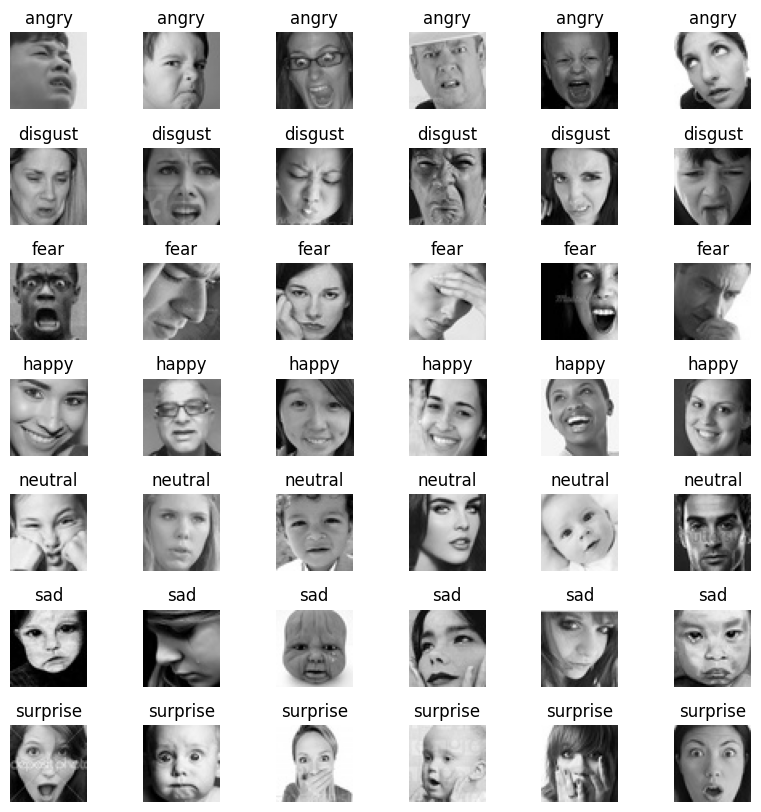

In [4]:
data_analyzer.display_images_per_label()

## Amount of Samples per Class

In [5]:
labels, file_counts = data_analyzer.count_files_per_label()
print("labels: ", labels)
print("file counts: ", file_counts)

labels:  ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
file counts:  [3995, 436, 4097, 7215, 4965, 4830, 3171]


In [6]:
data_analyzer.plot_files_per_label(labels, file_counts)

## Image Statistics

In [7]:
label_statistics = data_analyzer.calculate_image_statistics_by_label()

In [8]:
data_analyzer.plot_statistics_by_label(label_statistics)

## t-SNE - Flatten Images

In [9]:
class_labels = data_analyzer.get_original_class_labels(train_data)

In [10]:
flattened_images, labels = data_analyzer.flatten_images(train_data)

In [11]:
# data_analyzer.calculate_tsne_perplexity(flattened_images,
#                                         min_perplexity=5,
#                                         max_perplexity=100,
#                                         step=5)

In [12]:
data_analyzer.tsne_visualization(data=flattened_images,
                                 labels=labels,
                                 perplexity=25,
                                 class_labels=class_labels)

KeyboardInterrupt: 

In [ ]:
data_analyzer.tsne_visualization(data=flattened_images,
                                 labels=labels,
                                 class_labels=class_labels,
                                 dimensions=3)

## t-SNE ViT embeddings

In [ ]:
from collections import Counter

def extract_samples(df, max_samples_per_class=None):
    X = df.drop('label', axis=1)
    y = df['label']

    if max_samples_per_class is None:
        return X, y

    class_counts = Counter(y)

    # Limit samples per class if necessary
    if max_samples_per_class is not None:
        filtered_X = pd.DataFrame()
        filtered_y = pd.Series()
        for cls, count in class_counts.items():
            if count <= max_samples_per_class:
                filtered_X = pd.concat([filtered_X, X[y == cls]])
                filtered_y = pd.concat([filtered_y, y[y == cls]])
            else:
                filtered_X = pd.concat([filtered_X, X[y == cls].head(max_samples_per_class)])
                filtered_y = pd.concat([filtered_y, y[y == cls].head(max_samples_per_class)])
        return filtered_X.values, filtered_y

X, y = extract_samples(embeddings_data, max_samples_per_class=400)

NameError: name 'embeddings_data' is not defined

In [ ]:
data_analyzer.calculate_tsne_perplexity(X,
                                        min_perplexity=5,
                                        max_perplexity=100,
                                        step=5)

/Users/diogoalves/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/diogoalves/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/Users/diogoalves/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/diogoalves/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/Users/diogoalves/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/diogoalves/miniforg

In [ ]:
data_analyzer.plot_tsne_from_embeddings(X=X,
                                        y=y.values,
                                        perplexity=95
                                        )

NameError: name 'X' is not defined

In [ ]:
data_analyzer.plot_pca_embeddings(X=X,y=y.values)

In [ ]:
data_analyzer.plot_tsne_from_embeddings(X,
                                        y,
                                        dimensions=3)

/Users/diogoalves/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/diogoalves/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

